In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
file_path = '/Users/claudiomema/Documents/College/Penn State/DAAN 881/war_territ_death.csv'
data = pd.read_csv(file_path)

In [28]:
# Display first few rows to understand the data structure
data.head()

,ID,Country,Latitude,Longitude,Page,Battle,Year,Participants,War,Winner,...,type_of_conflict,battle_location,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,gwno_battle,region,version
0,1stDragasani1821,Greece,44.663180,24.260871,"Clodfelter, p191",Dragasani,1821,NaN,Greek War of Independence,Greek Rebels,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1stGiurgevo1811,Romania,43.897701,25.927498,"Clodfelter, p190",Giurgevo,1811,NaN,Russo-Turkish Wars,Ottoman Empire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2ndBreslau1757,Poland,51.107885,17.038538,"Clodfelter, p80",Breslau,1757,NaN,Seven Years War,Prussia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2ndGiurgevo1811,Romania,43.897701,25.927498,NaN,Giurgevo,1811,NaN,Russo-Turkish Wars,Russia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2ndSchweidnitz1757,Poland,50.849843,16.475679,"Clodfelter, p80",Schweidnitz,1757,NaN,Seven Years' War,Prussia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Print the numerical columns
print("Numerical columns in the dataset:")
print(numerical_columns)

Numerical columns in the dataset:
['Latitude', 'Longitude', 'Lehmann Zhukov Scale', 'Minor', 'year_x', 'conflict_id', 'side_a_id', 'incompatibility', 'year_y', 'bd_best', 'bd_low', 'bd_high', 'type_of_conflict', 'gwno_a', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version']


In [30]:
# Step 2: Ensure columns are numeric (handle non-numeric values)
# Convert columns to numeric, coercing errors so non-numeric values become NaN
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [41]:
# Step 3: IQR Method to Identify Outliers
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply IQR method for each numerical column
iqr_outliers_dict = {}
for col in numerical_columns:
    outliers = iqr_outliers(data, col)
    iqr_outliers_dict[col] = outliers




In [55]:
# Step 4: Visualization of IQR Outliers Using Boxplots

# Function to visualize IQR outliers using boxplots without excessive labeling
def visualize_iqr_outliers(df, columns, iqr_outliers_dict):
    for column in columns:
        plt.figure(figsize=(10, 6))
        
        # Create boxplot for the data
        sns.boxplot(x=df[column], color='lightblue')
        plt.title(f'Boxplot for {column} with IQR Outliers')

        # Overlay IQR outliers in red as dots without labeling each one
        if column in iqr_outliers_dict and not iqr_outliers_dict[column].empty:
            iqr_outliers = iqr_outliers_dict[column][column].dropna()
            plt.scatter(iqr_outliers, [0] * len(iqr_outliers), color='red', label='IQR Outliers', s=30)

        plt.legend()
        plt.show()

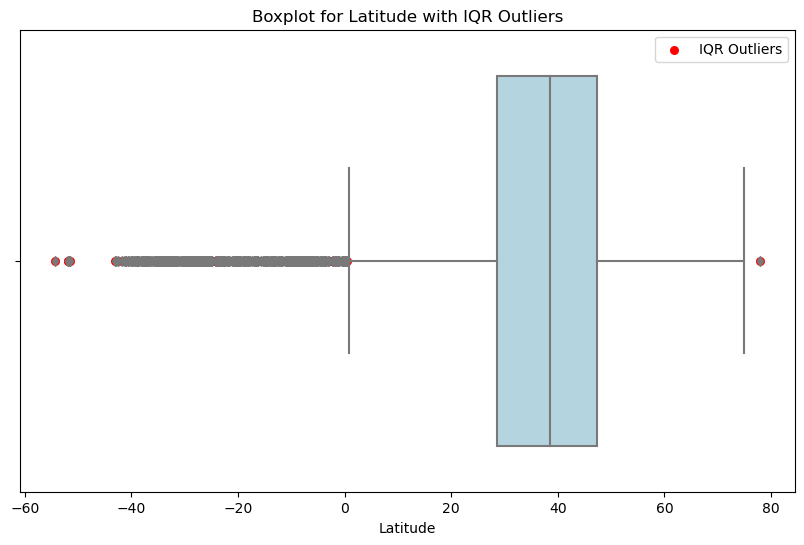

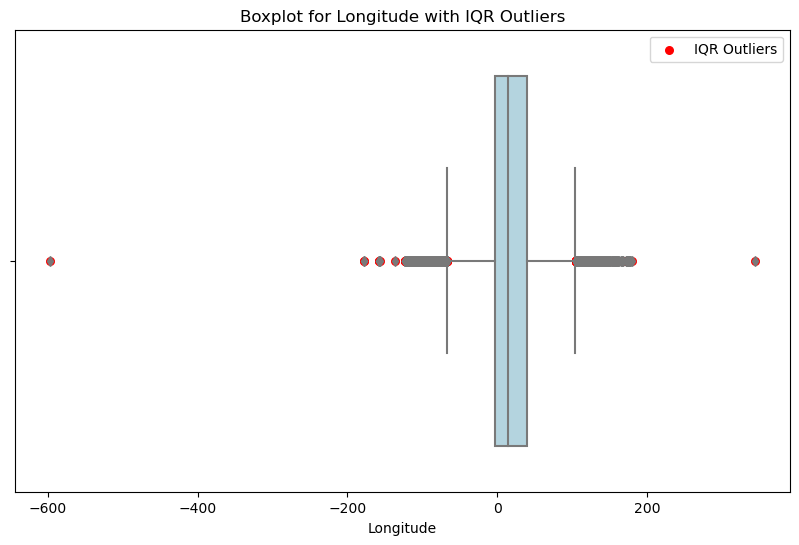

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


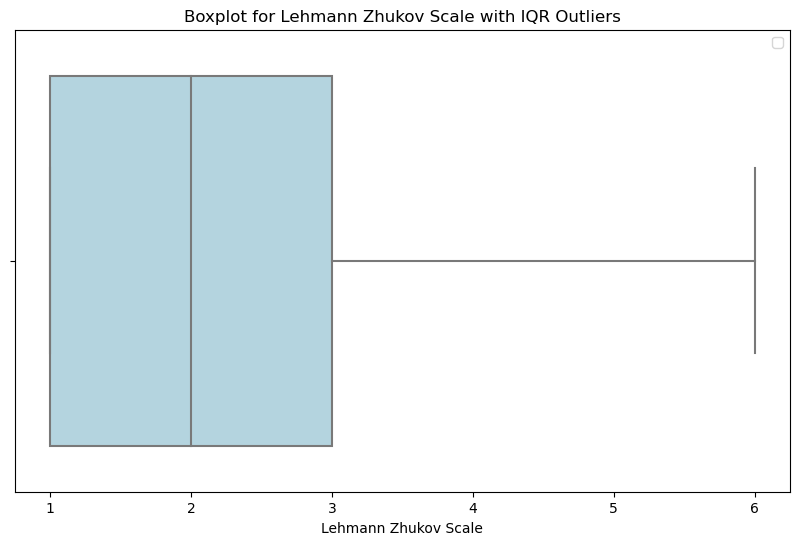

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


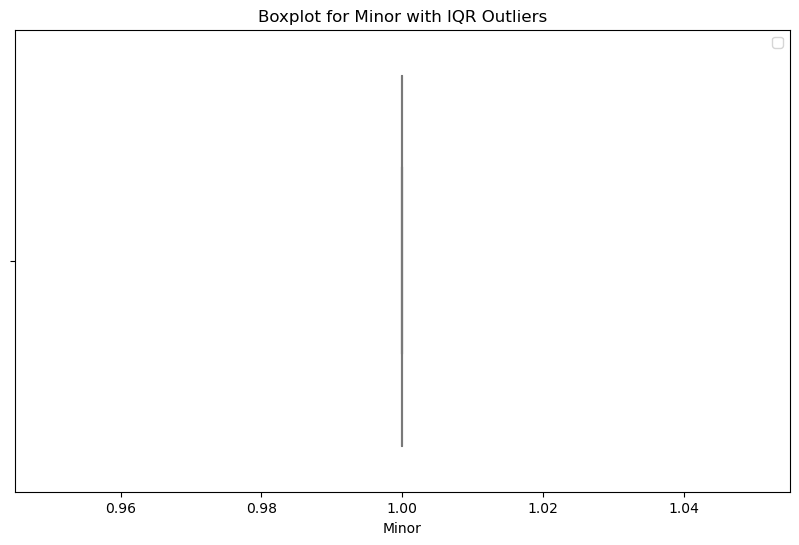

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


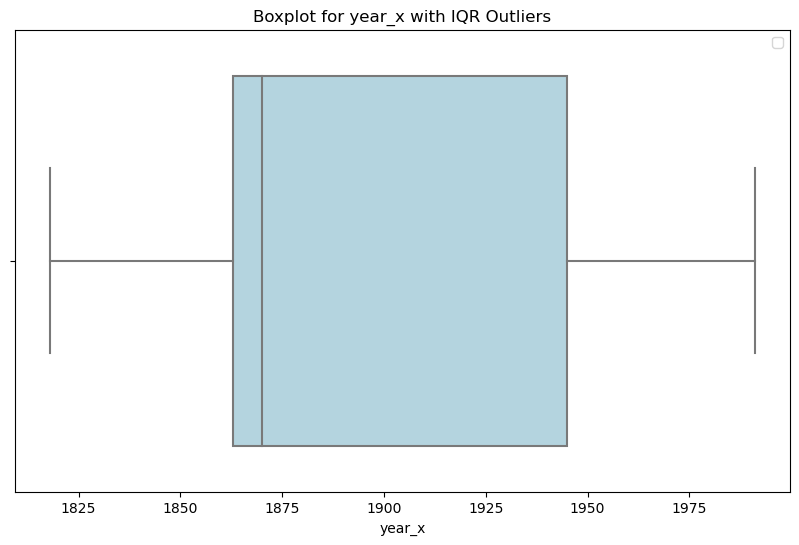

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


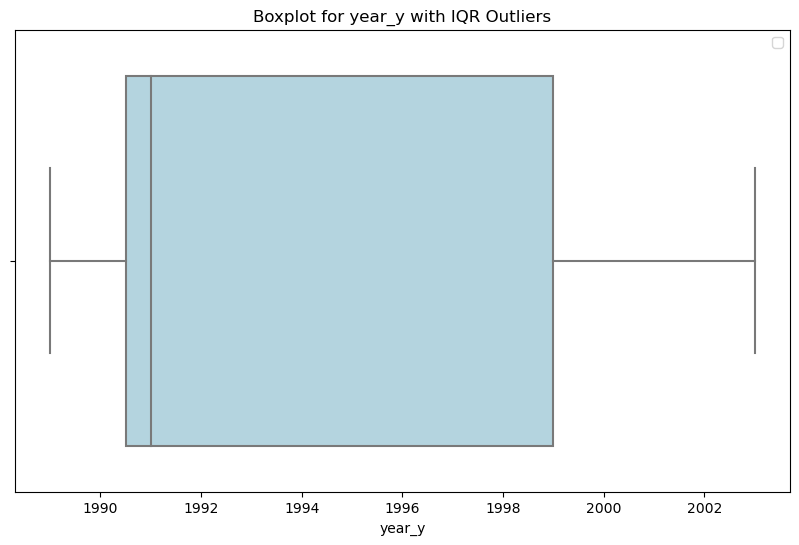

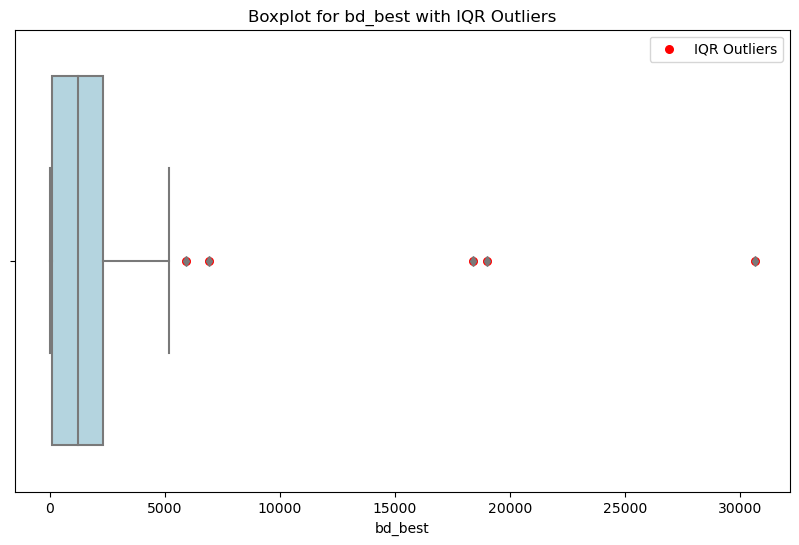

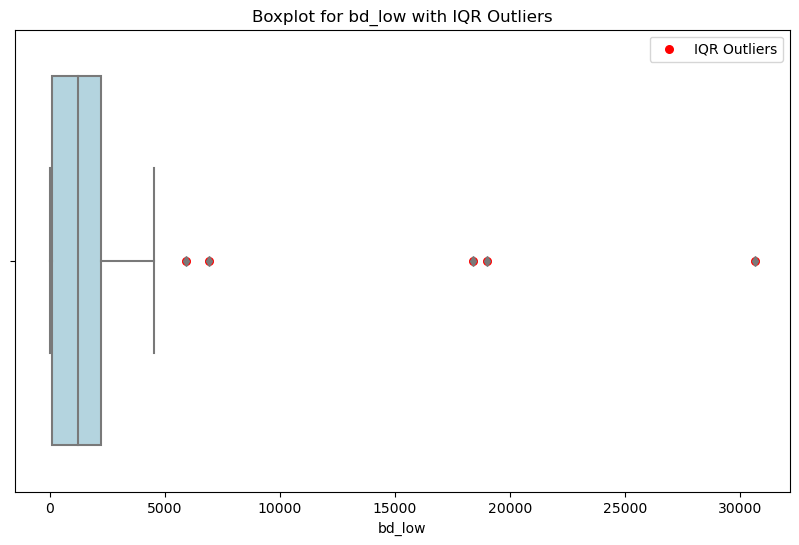

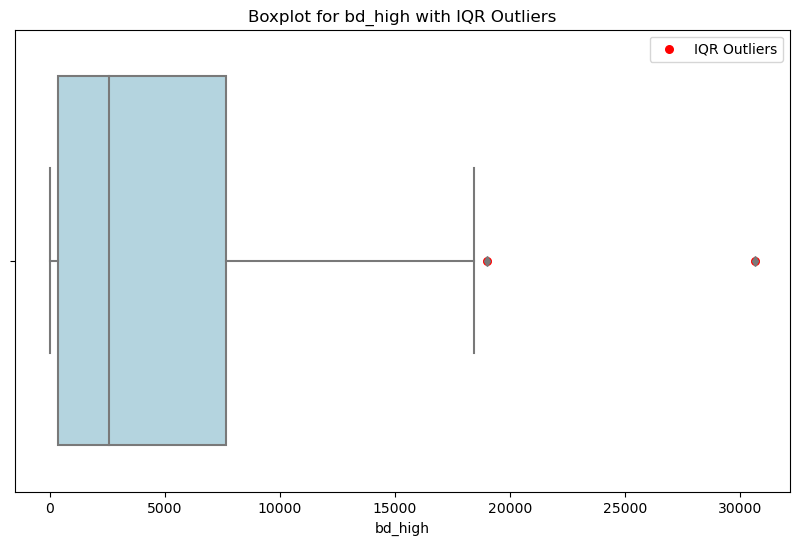

In [56]:
# Step 5: Visualize IQR outliers for all relevant columns
relevant_columns = ['Latitude', 'Longitude', 'Lehmann Zhukov Scale', 'Minor', 'year_x', 'year_y', 'bd_best', 'bd_low', 'bd_high']  # Add other columns as needed
visualize_iqr_outliers(data, relevant_columns, iqr_outliers_dict)



In [52]:
# Scatterplots for Continuous Variables
# Function to visualize scatterplots with IQR outliers
def scatterplots_with_iqr_outliers(df, columns, iqr_outliers_dict):
    for column in columns:
        plt.figure(figsize=(10, 6))
        
        # Scatter plot for all data points
        plt.scatter(df.index, df[column], color='gray', alpha=0.5, label='Data Points')
        
        # Overlay IQR outliers in red
        if column in iqr_outliers_dict and not iqr_outliers_dict[column].empty:
            iqr_outliers = iqr_outliers_dict[column][column].dropna()
            plt.scatter(iqr_outliers.index, iqr_outliers, color='red', label='IQR Outliers')

        plt.title(f'Scatterplot with IQR Outliers for {column}')
        plt.legend()
        plt.show()

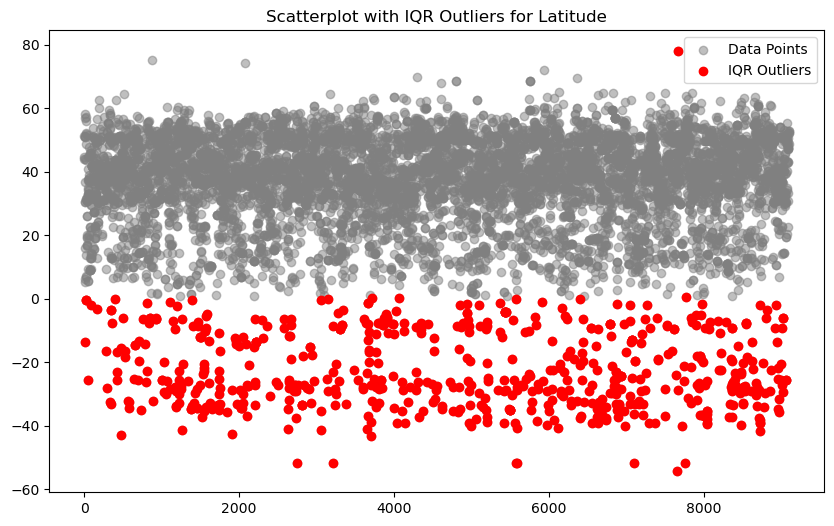

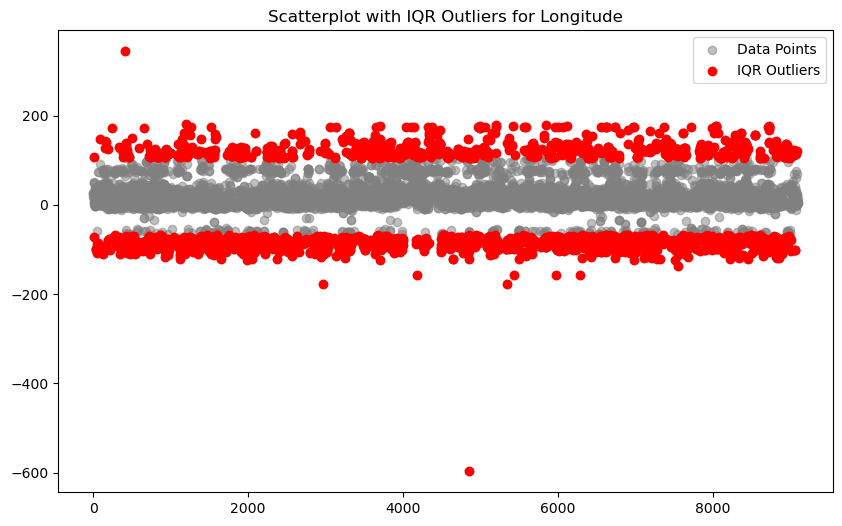

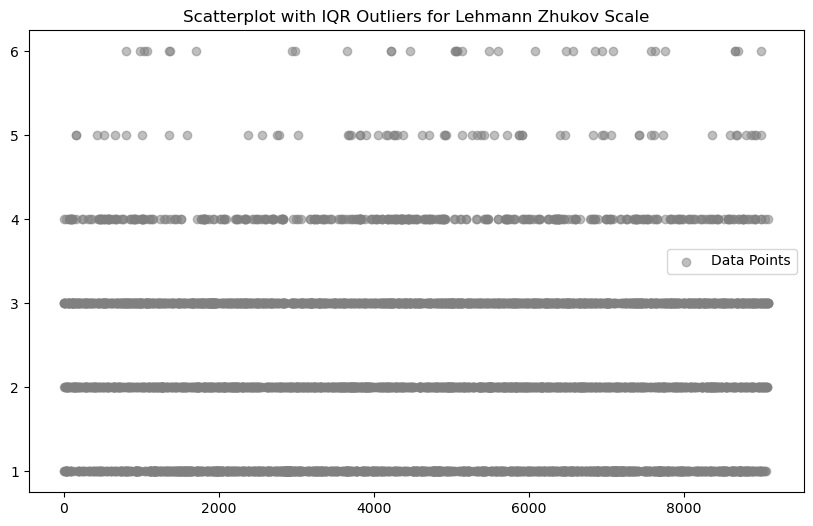

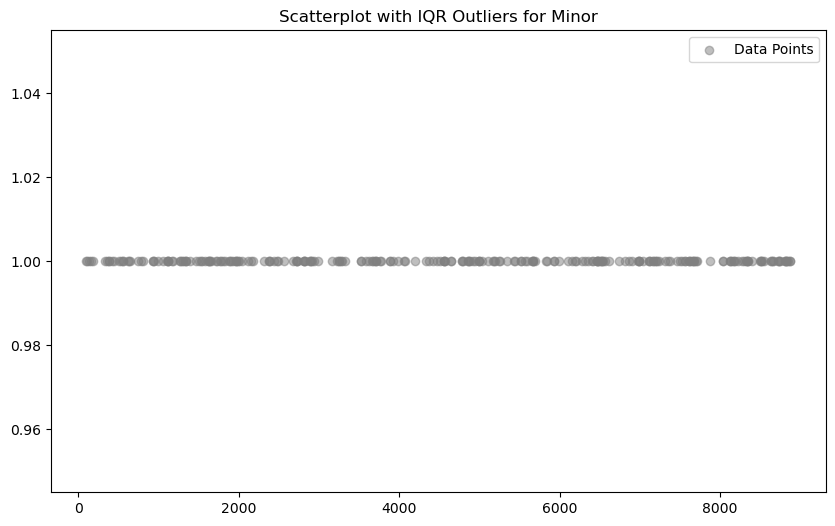

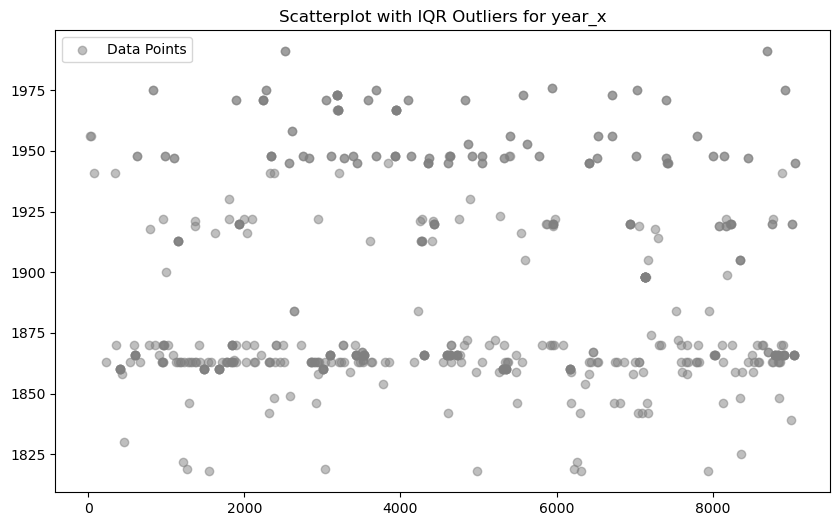

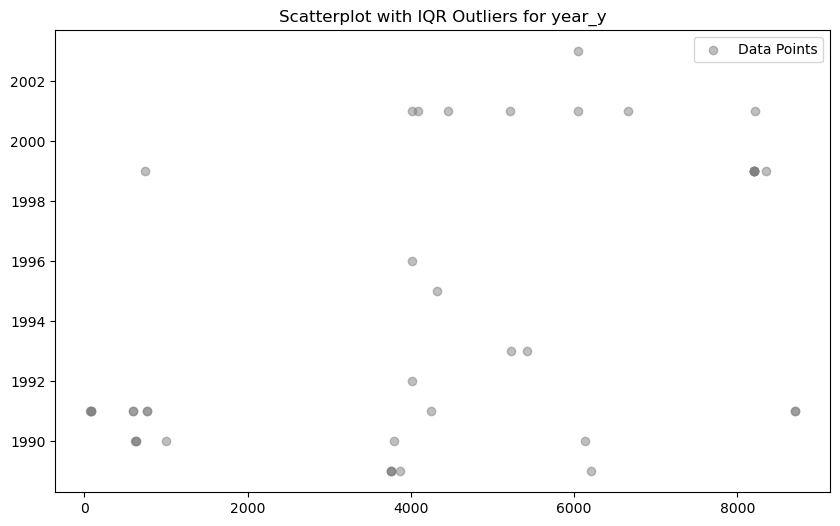

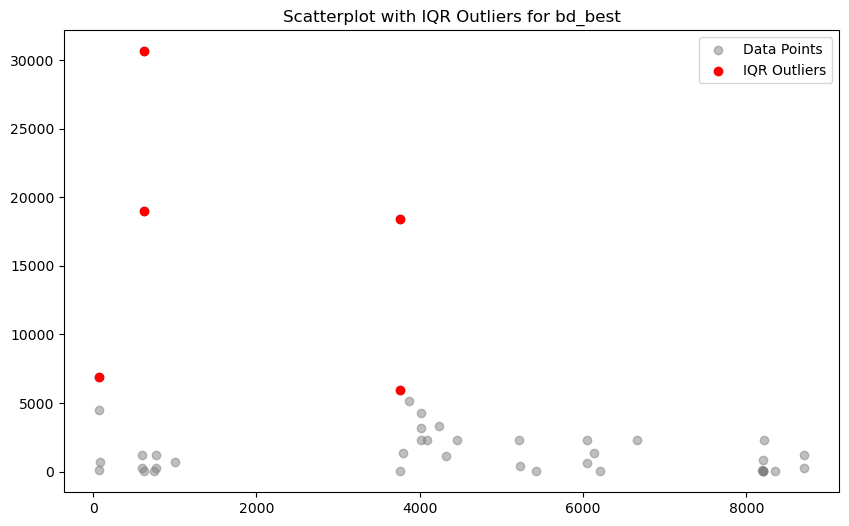

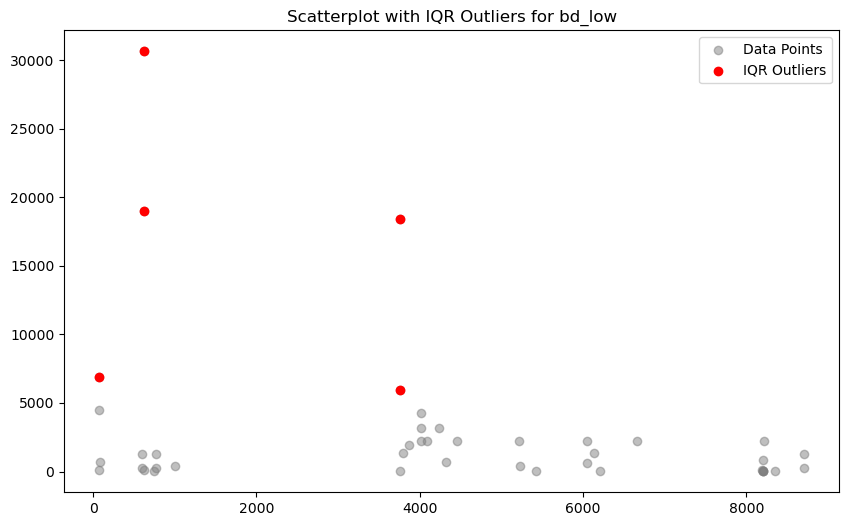

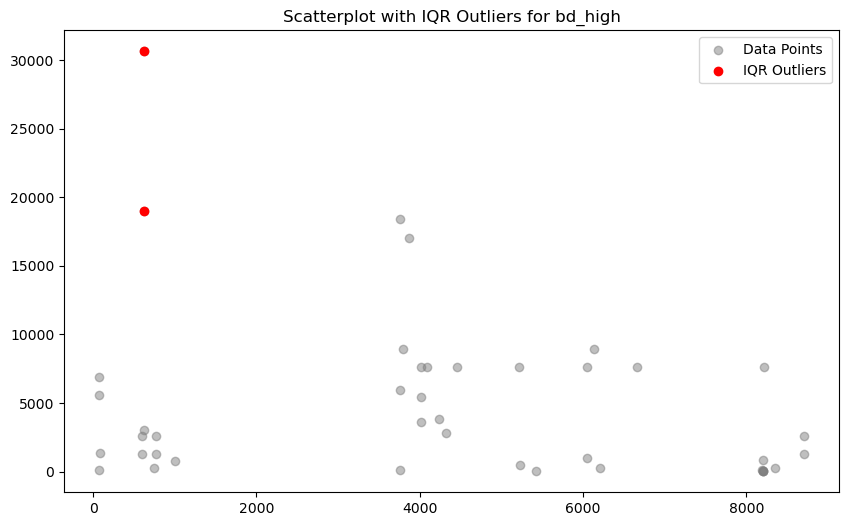

In [51]:
# Step 7: Use scatterplots for continuous variables where appropriate
scatterplots_with_iqr_outliers(data, relevant_columns, iqr_outliers_dict)
